<h1 style="color:blue; background:pink; text-align:center; font-family:Arial Black; line-height:2">SMS Spam Classification</h1>
<h3 style="color:gray; line-height:1.2">In day to day life we recieve many normal messages from variety of users, out of total messages we recieve maximum are irrelevent/spam. Hence it is necessary to filter the messages and categories them as spam or ham.</h3>

<h2 style="color:blue; background:lightgreen; line-height:2">Context</h2>
<h3 style="color:gray; line-height:1.2">The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.</h3>

<h2 style="color:blue; background:lightgreen; line-height:2">Import Basic Required Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; background:lightgreen; line-height:2">Load the dataset</h2>

In [2]:
pd.options.display.max_colwidth=100000

In [3]:
df=pd.read_csv('dataset/sms.csv', encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


<h2 style="color:blue; background:lightgreen; line-height:2">Understanding the data</h2>

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<h2 style="color:blue; background:lightgreen; line-height:2">Rename and Remove Unwanted columns.</h2>

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

df.rename({'v1':'spam','v2':'sms'}, axis=1, inplace=True)
df.columns

Index(['spam', 'sms'], dtype='object')

<h2 style="color:blue; background:lightgreen; line-height:2">Missing values</h2>

In [7]:
df.isna().sum()

spam    0
sms     0
dtype: int64

<b style="color:blue">No missing values in the dataset</b>

<h2 style="color:blue; background:lightgreen; line-height:2">Duplicate rows</h2>

In [8]:
df.duplicated().sum()

403

<b style="color:blue">There are total 403 duplicate rows in our dataset. Keep the first occurance and drop rest</b>

In [4]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

<b style="color:blue">Now there are no duplicates in dataset.</b>

<h2 style="color:blue; background:lightgreen; line-height:2">Exploratory Data Analysis</h2>

<h2 style="color:blue; background:lightblue; line-height:1.5">Count of Spam and Ham SMS</h2>

In [10]:
df['spam'].value_counts()

spam
ham     4516
spam     653
Name: count, dtype: int64

In [11]:
#function to add Data Label
def data_label(index, values):
    for i in range(len(index)):
        plt.text(i, values[i]/2, values[i], fontsize=15, color='red')

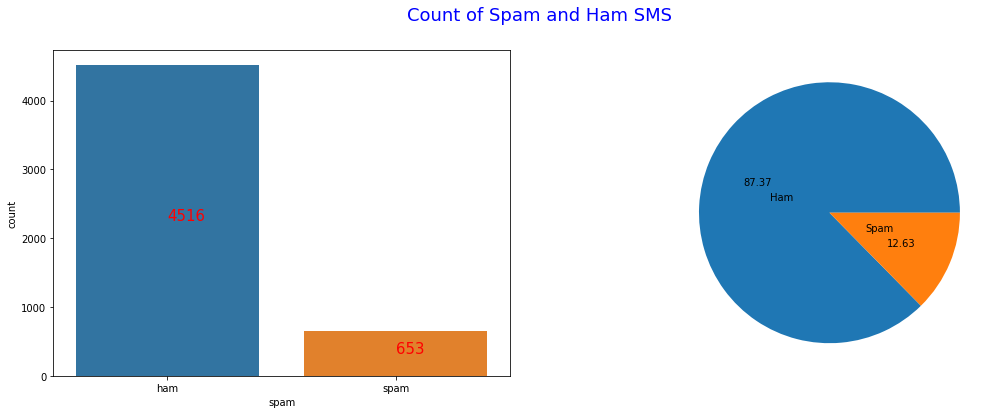

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x='spam', data=df, order=df['spam'].value_counts().index);
data_label(df['spam'].value_counts().index, df['spam'].value_counts().values)

plt.subplot(122)
plt.pie(df['spam'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f', labeldistance=0.3)
plt.suptitle("Count of Spam and Ham SMS", fontsize=18, color='blue');

<b style="color:blue">Target class is highly imbalance. Ham SMS count is about 87.37% and Spam SMS are 12.63%.</b>

<h2 style="color:blue; background:lightgreen; line-height:2">Convert spam to 1 and ham to 0</h2>

In [8]:
df['spam'].replace({'spam':1, 'ham':0}, inplace=True)
df['spam'].unique()

array([0, 1], dtype=int64)

<h2 style="color:blue; background:lightgreen; line-height:2">Extract some basic features</h2>

<b style="color:blue;">1. SMS length<br>2. Total Sentences.<br> 3. Total Words in SMS.<br>4. Total Stopwords.<br>5. Total Non Stopwords in SMS</b>

#### 1. SMS Length

In [9]:
df['sms_length']=df['sms'].str.len()

#### 2. Total Sentences in SMS

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
df['total_sentence']=df['sms'].apply(lambda x : len(sent_tokenize(x)))

#### 3. Total Word in SMS

In [11]:
df['total_words']=df['sms'].apply(lambda x : len(word_tokenize(x)))

#### 4. Total Stopwords in SMS

In [12]:
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
df['total_stopwords']=df['sms'].apply(lambda x : len([word for word in word_tokenize(x) if word in stopwords]))

#### 5. Total Non Stopwords in SMS

In [13]:
df['total_nonstopwords']=df['sms'].apply(lambda x : len([word for word in word_tokenize(x) if word not in stopwords]))

In [14]:
df.head()

,spam,sms,sms_length,total_sentence,total_words,total_stopwords,total_nonstopwords
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,2,24,4,20
1,0,Ok lar... Joking wif u oni...,29,2,8,0,8
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,2,37,5,32
3,0,U dun say so early hor... U c already then say...,49,1,13,2,11
4,0,"Nah I don't think he goes to usf, he lives around here though",61,1,15,5,10


<h2 style="color:blue; background:lightgreen; line-height:2">Analyze Basic Statistics for Extracted Features</h2>

In [15]:
print("Statistical Summary When SMS is HAM")
pd.DataFrame(df[df['spam']==0].describe().T.round(0))

Statistical Summary When SMS is HAM


,count,mean,std,min,25%,50%,75%,max
spam,4516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sms_length,4516.0,70.0,56.0,2.0,34.0,52.0,90.0,910.0
total_sentence,4516.0,2.0,1.0,1.0,1.0,1.0,2.0,28.0
total_words,4516.0,17.0,13.0,1.0,8.0,13.0,22.0,220.0
total_stopwords,4516.0,5.0,5.0,0.0,2.0,4.0,6.0,89.0
total_nonstopwords,4516.0,12.0,10.0,1.0,6.0,9.0,15.0,211.0


In [16]:
print("Statistical Summary When SMS is SPAM")
pd.DataFrame(df[df['spam']==1].describe().T.round(0))

Statistical Summary When SMS is SPAM


,count,mean,std,min,25%,50%,75%,max
spam,653.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
sms_length,653.0,138.0,30.0,13.0,132.0,149.0,157.0,224.0
total_sentence,653.0,3.0,1.0,1.0,2.0,3.0,4.0,8.0
total_words,653.0,28.0,7.0,2.0,25.0,29.0,32.0,46.0
total_stopwords,653.0,6.0,3.0,0.0,3.0,6.0,8.0,17.0
total_nonstopwords,653.0,22.0,6.0,2.0,19.0,22.0,26.0,42.0


### Insight:
<b style="color:blue">1. Average length/characters of HAM SMS is 70, but for the SPAM SMS 138.<br>2. Minimum characters in HAM SMS are 2, and in SPAM SMS are 13.<br>3. Maximum length of HAM SMS is 910 and SPAM SMS is 224.<br>4. Average senteneces in HAM are 2 and in SPAM are 3.<br>5. Minimum sentences in both SPAM and HAM are 1.<br>6. Maximum sentences is HAM are 28, and in SPAM are 8.<br>7. Average words in HAM are 17 and in SPAM are 28.<br>8. Minimum words is HAM are 1 and in SPAM are 2.<br>9. Maximum words in HAM are 220 and in SPAM are 46.<br>9. Average stopwords and non-stopwords in HAM SMS is 5 and 12 respectively and in SPAM is 6 and 22 respectively.<br>10.Maximum stopwords in HAM is 89 and SPAM is 17.<br>11. Maximum nonstopwords in HAP is 211 and in SPAM is 42.</b>

<h2 style="color:blue; background:lightgreen; line-height:2">Histogram to Analyze Extracted Features</h2>

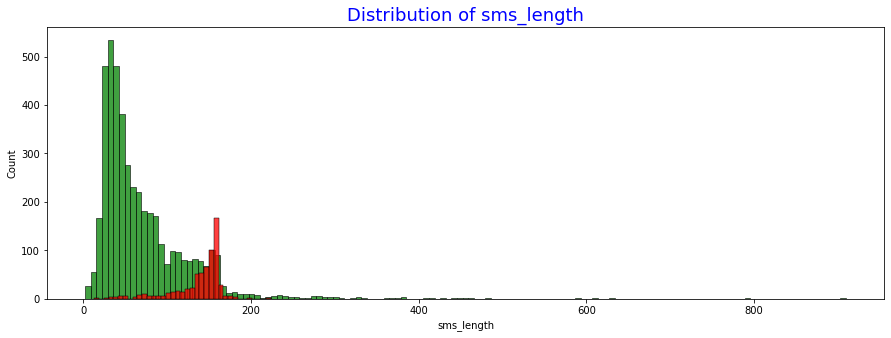

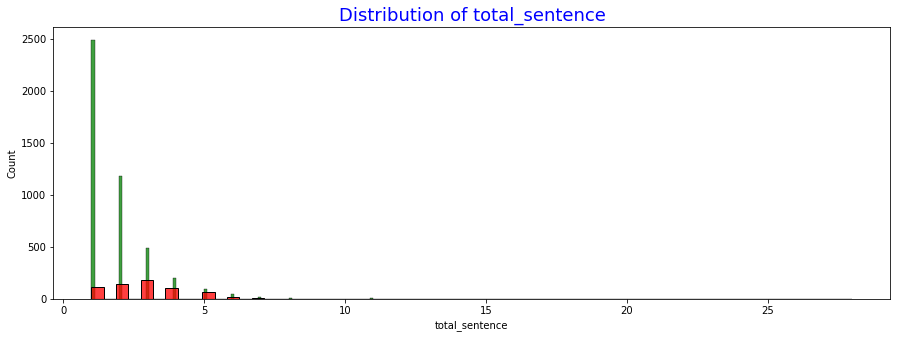

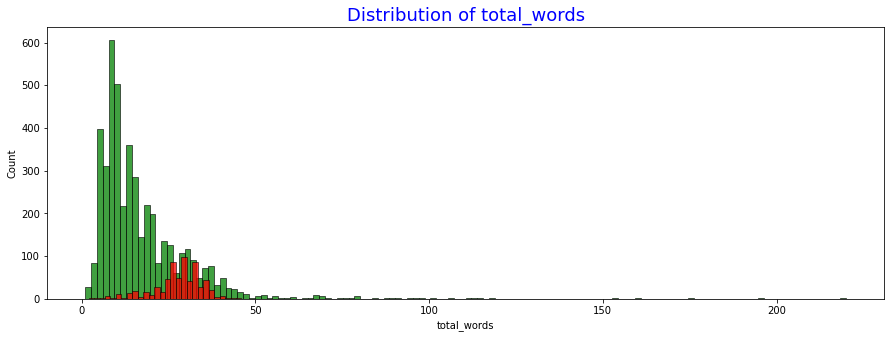

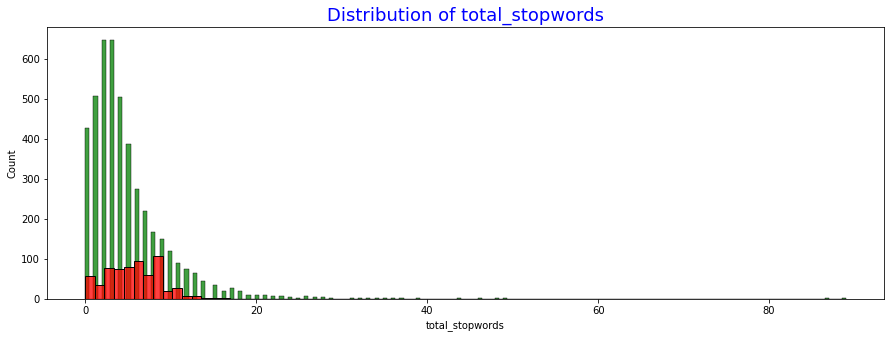

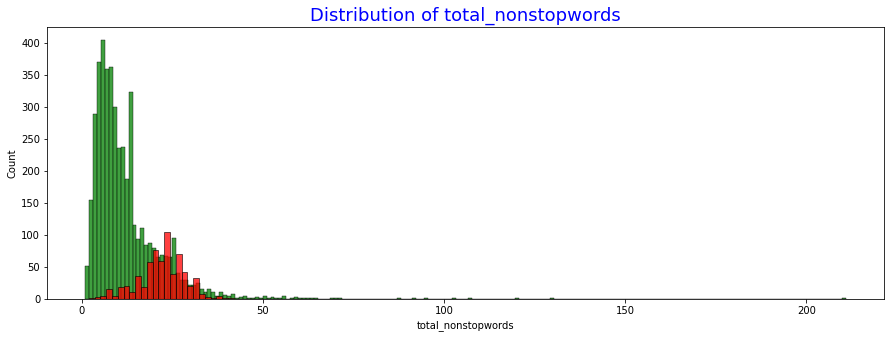

In [28]:
ext_feat=['sms_length', 'total_sentence', 'total_words', 'total_stopwords', 'total_nonstopwords']
for col in ext_feat:
    plt.figure(figsize=(15,5))
    sns.histplot(df[df['spam']==0][col], color='green')
    sns.histplot(df[df['spam']==1][col], color='red')
    plt.title(f"Distribution of {col}", fontsize=18, color='blue');

### From graphs we conclude that It is not posible to seperate HAM and SPAM exactly.

<h2 style="color:blue;">To move further to preprocessing the data and building machine learning model split the data into train and test and proceed to avoid data leakage proble.</h2>

<h2 style="color:blue; background:lightgreen; line-height:2">Seperate Input and Output/Target features</h2>

In [19]:
X=df.drop('spam', axis=1)
y=df['spam']

In [20]:
print("Input features")
X.head()

Input features


,sms,sms_length,total_sentence,total_words,total_stopwords,total_nonstopwords
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,2,24,4,20
1,Ok lar... Joking wif u oni...,29,2,8,0,8
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,2,37,5,32
3,U dun say so early hor... U c already then say...,49,1,13,2,11
4,"Nah I don't think he goes to usf, he lives around here though",61,1,15,5,10


In [21]:
print("Outpur or Target feature")
y.head()

Outpur or Target feature


0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: int64

<h2 style="color:blue; background:lightgreen; line-height:2">Split data into training and testing set</h2>

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
print("X train shape", x_train.shape, "\nX test shape", x_test.shape,
      "\ny train shape", y_train.shape, "\ny test shape", y_test.shape)

X train shape (4135, 6) 
X test shape (1034, 6) 
y train shape (4135,) 
y test shape (1034,)


<h2 style="color:blue; background:lightgreen; line-height:2">Text Preprocessing</h2>

<b style="color:blue;">1. In the text messages there are many external links, numbers, emojis, and the sms langauge is used to communicate. In the text processing we need to remove all the characters except text.<br>2. There are many frequently used words called stopwords, we need to remove these words as they do not contains any sensual information, they are just supportive words.<br>3. Convert short sms language words to its full form.<br>4.Correcting the spelling mistake.<br>5. Remove Extra Spaces.<br>6. Removing HTML tags and URL's.<br>7. Converting a word to its root form using either by Stemming or by Lemmatization.</b>

<h2 style="color:blue; background:lightblue; line-height:1">Import required libraries for text preprocessing</h2>

In [23]:
import re
import contractions                              #expanding sms language words
from textblob import TextBlob                    #Spelling correction
from nltk.corpus import stopwords
stopwords_en=stopwords.words("english")          #Stopword removing
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()                        #Lemmatization

In [24]:
def text_preprocessing(text):
    text=str(text).lower()                                                  #Lowering
    text=text.replace('%', ' percent')
    text=text.replace('$', ' dollar ')
    text=text.replace('₹', ' rupee ')
    text=text.replace('€', ' euro ')
    text=text.replace('@', ' at ')                                          #Changing current symbol to word
    
    text=re.sub("u", "you", text)
    text=re.sub("ur", "your", text)
    text=re.sub("u'r", "you are", text)
    text=re.sub("wanna", "wanted to", text)
    text=re.sub("c", "see", text)
    text=re.sub("gt", "great", text)
    text=re.sub("gn", "good night", text)
    text=re.sub("ge", "good evening", text)
    text=re.sub("gm", "good morning", text)
    text=re.sub("juzz", "just", text)
    text=re.sub("u'r", "you are", text)
        
    text=text.replace(',000,000,000 ', 'b ')
    text=text.replace(',000,000 ', 'm ')
    text=text.replace(',000 ', 'k ')
    text=re.sub(r'([0-9]+)000000000', r'\1b', text)
    text=re.sub(r'([0-9]+)000000', r'\1m', text)
    text=re.sub(r'([0-9]+)000', r'\1k', text)                               #Changing number to Billion, Million or Thounds
    pattern=re.compile('\W')
    text=re.sub(pattern, ' ', text).strip()
    text=re.sub("<.*?>", " ", text)                                         #Remove html tags
    text=contractions.fix(str(text))                                        #Expanding Contraction
    text=re.sub(" +"," ", text)                                             #Remove extra spaces
    text=[word for word in text.split(" ") if word not in stopwords_en]     #Remove Stopwords
    text=" ".join(text)
    text=[lemma.lemmatize(word) for word in text.split(" ")]                #Lemmatization
    text=" ".join(text)
    return text

<h2 style="color:blue; background:lightblue; line-height:1">Apply above function to both x train and x test</h2>

In [25]:
x_train['sms_clean']=x_train['sms'].apply(text_preprocessing)
x_train.head()

,sms,sms_length,total_sentence,total_words,total_stopwords,total_nonstopwords,sms_clean
3794,Also remember the beads don't come off. Ever.,45,2,11,3,8,also remember bead seeome ever
4290,Call me when u're done...,25,1,7,2,5,seeall yoyou aree done
2603,"\Im at arestaurant eating squid! i will be out about 10:30 wanna dosomething or is that to late?\""""",99,2,24,10,14,arestayoyourant eating sqyouid oyout aboyout 10 30 wanted dosomething late
3452,"Nowadays people are notixiquating the laxinorficated opportunity for bambling of entropication.... Have you ever oblisingately opted ur books for the masteriastering amplikater of fidalfication? It is very champlaxigating, i think it is atrocious.. Wotz Ur Opinion???? Junna",274,3,45,13,32,nowadays people notixiqyouating laxinorfiseeated opportyounity bambling entropiseeation yoyou ever oblisingately opted yoyour book masteriastering amplikater fidalfiseeation seehamplaxigating think atroseeioyous wotz yoyour opinion jyounna
3132,So no messages. Had food?,25,2,7,1,6,messagood evening food


In [26]:
x_test['sms_clean']=x_test['sms'].apply(text_preprocessing)
x_test.head()

,sms,sms_length,total_sentence,total_words,total_stopwords,total_nonstopwords,sms_clean
1851,Dunno da next show aft 6 is 850. Toa payoh got 650.,51,2,14,1,13,dyounno da next show aft 6 850 toa payoh got 650
2375,Thanx 4 2day! U r a goodmate I THINK UR RITE SARY! ASUSUAL!1 U CHEERED ME UP! LOVE U FRANYxxxxx,95,4,25,1,24,thanx 4 2day r goodmate think yoyour rite sary asyousyoual 1 seeheered youp love franyxxxxx
2743,But my family not responding for anything. Now am in room not went to home for diwali but no one called me and why not coming. It makes me feel like died.,154,3,35,15,20,byout family responding anything room went home diwali byout one seealled seeoming make feel like died
3324,Nope... Juz off from work...,28,1,7,2,5,nope jyouz work
3995,We'll you pay over like &lt;#&gt; yrs so its not too difficult,63,1,19,6,13,yoyou pay like lt great yr diffiseeyoult


<h2 style="color:blue; line-height:1">Now the text look more clean.`</h2>

<h2 style="color:blue; background:lightgreen; line-height:2">Check the Frequently occuring words in Spam and HAM SMS</h2>

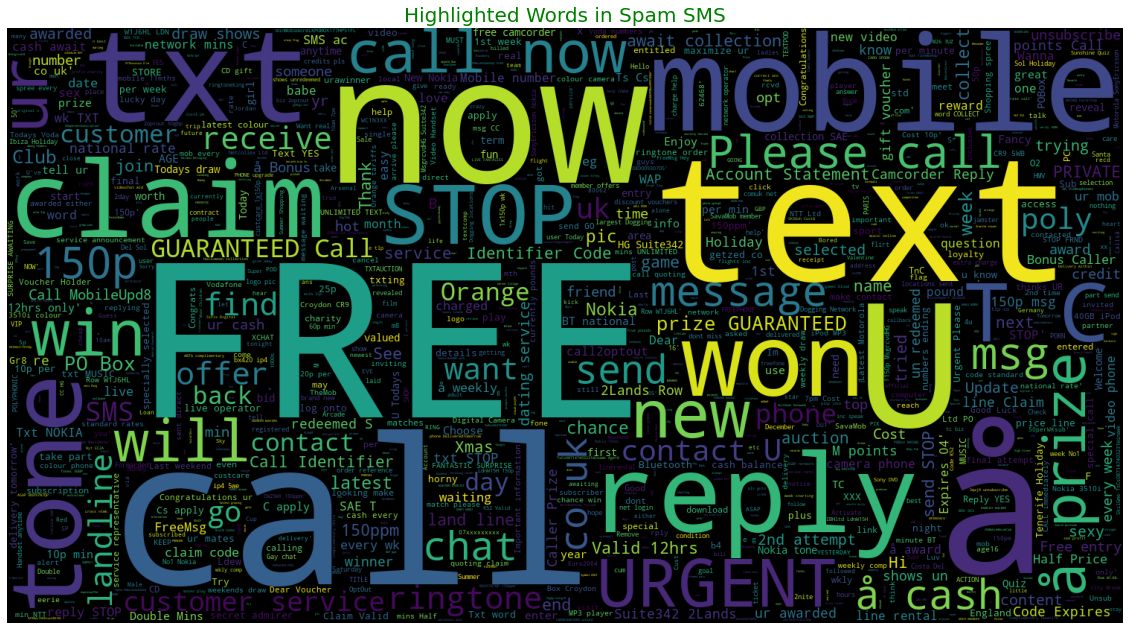

In [31]:
from wordcloud import WordCloud
graph=df[df['spam']==1]
txt=graph['sms'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(txt))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Words in Spam SMS", color='green', fontsize=20)
plt.axis('off');

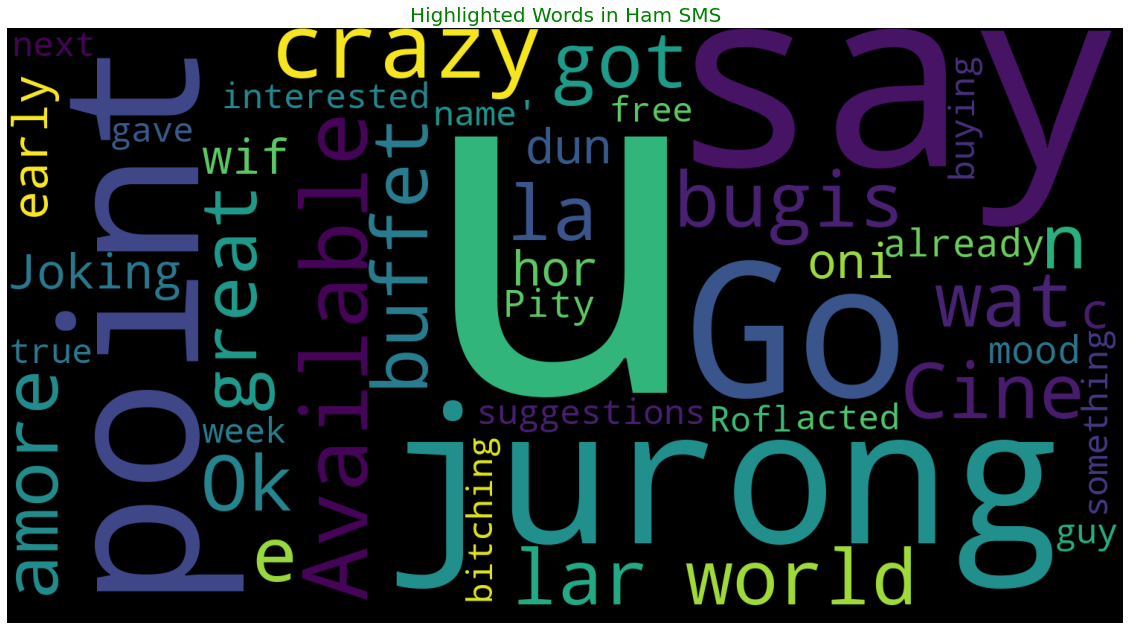

In [32]:
graph=df[df['spam']==0]
txt=graph['sms'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(txt))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Words in Ham SMS", color='green', fontsize=20)
plt.axis('off');

<h2 style="color:blue; background:lightgreen; line-height:1">Seperate Extracted Features and Clean SMS and apply Vectorization on CLean text and append extracted features to create final training data</h2>

In [29]:
ext_feat_train=x_train[ext_feat]
ext_feat_test=x_test[ext_feat]

<h2 style="color:blue; background:lightgreen; line-height:2">Text to Numeric Conversion Using Count Vectorizer</h2>

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cnt=CountVectorizer(ngram_range=(1,5))
cnt_fit=cnt.fit(x_train['sms_clean'])
text_train_tf=cnt_fit.transform(x_train['sms_clean'])
text_test_tf=cnt_fit.transform(x_test['sms_clean'])
print("Total VOcabulary", len(cnt_fit.vocabulary_))

Total VOcabulary 112467


In [31]:
from scipy.sparse import hstack
x_train_cnt=hstack((text_train_tf, ext_feat_train))
x_test_cnt=hstack((text_test_tf, ext_feat_test))

<h2 style="color:blue; background:lightgreen; line-height:2">Run "FOR" loop to build, train, fit, predict and evaluate the ML classification models</h2>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

In [37]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Ada Boost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "XG Boost":XGBClassifier()
}

Building Logistic Regression :
Train Acuuracy=0.9993
Test Acuuracy=0.9671
Precission=0.9528
Recall=0.8121
F1 Score=0.8768
Confusion Matrix:



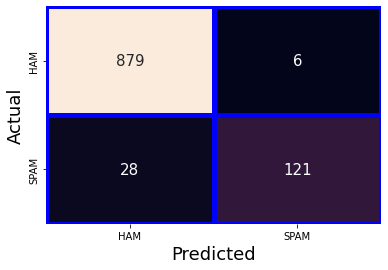

Out of 1034 testing values 34 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       885
           1       0.95      0.81      0.88       149

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Decision Tree :
Train Acuuracy=1.0
Test Acuuracy=0.9632
Precission=0.8993
Recall=0.8389
F1 Score=0.8681
Confusion Matrix:



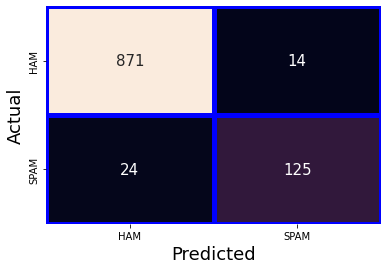

Out of 1034 testing values 38 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       885
           1       0.90      0.84      0.87       149

    accuracy                           0.96      1034
   macro avg       0.94      0.91      0.92      1034
weighted avg       0.96      0.96      0.96      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Random Forest :
Train Acuuracy=1.0
Test Acuuracy=0.9468
Precission=1.0
Recall=0.6309
F1 Score=0.7737
Confusion Matrix:



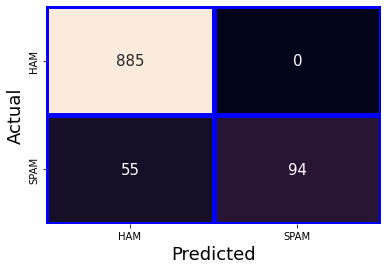

Out of 1034 testing values 55 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       885
           1       1.00      0.63      0.77       149

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.87      1034
weighted avg       0.95      0.95      0.94      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Ada Boost :
Train Acuuracy=0.9809
Test Acuuracy=0.9739
Precission=0.9692
Recall=0.8456
F1 Score=0.9032
Confusion Matrix:



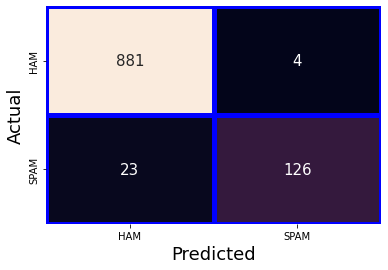

Out of 1034 testing values 27 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.97      0.85      0.90       149

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Gradient Boost :
Train Acuuracy=0.9865
Test Acuuracy=0.97
Precission=0.9683
Recall=0.8188
F1 Score=0.8873
Confusion Matrix:



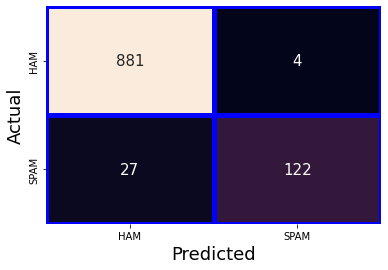

Out of 1034 testing values 31 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.97      0.82      0.89       149

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building XG Boost :
Train Acuuracy=0.9971
Test Acuuracy=0.9816
Precission=0.971
Recall=0.8993
F1 Score=0.9338
Confusion Matrix:



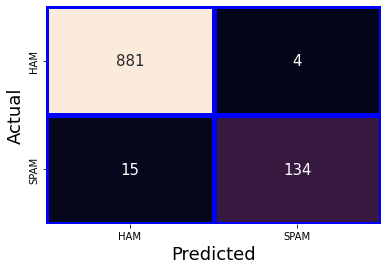

Out of 1034 testing values 19 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



In [39]:
for algorithm, classifier in models.items():
    print("Building", algorithm, ":")
    classifier.fit(x_train_cnt, y_train)
    y_train_pred=classifier.predict(x_train_cnt)
    y_test_pred=classifier.predict(x_test_cnt)
    train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
    test_accuracy=round(accuracy_score(y_test, y_test_pred), 4)
    precision=round(precision_score(y_test, y_test_pred), 4)
    recall=round(recall_score(y_test, y_test_pred), 4)
    f1=round(f1_score(y_test, y_test_pred), 4)
    print("Train Acuuracy={}\nTest Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(train_accuracy, test_accuracy,
                                                                                              precision, recall, f1))
    print("Confusion Matrix:\n")
    sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["HAM","SPAM"], xticklabels=["HAM","SPAM"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.show()
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_test_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_test_pred))
    print("-+-+"*20)
    print()

### Conclusion for ML model using CountVectorizer.
<h3 style="color:blue; line-height:1.5;">1. Training accuracy is high in both Decision Tree Random Forest Model=100%.<br>2.Testing accuracy is high in XG Boost=98%.<br>3. F1 Score is high in XG Boost=93%.<br>4.Only 19 values are misclassified in XG Boost, which is lowest amongst all.<br>5. XG Boost is the best model to predict whether the SMS is spam or not.</h3>

<h2 style="color:blue; background:lightgreen; line-height:2">Text to Numeric Conversion Using TFIDF</h2>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(ngram_range=(1,5))
tfidf_fit=tfidf.fit(x_train['sms_clean'])
text_train_tf=tfidf_fit.transform(x_train['sms_clean'])
text_test_tf=tfidf_fit.transform(x_test['sms_clean'])
print("Total Vocabulary", len(tfidf_fit.vocabulary_))

Total Vocabulary 112467


In [42]:
from scipy.sparse import hstack
x_train_tfidf=hstack((text_train_tf, ext_feat_train))
x_test_tfidf=hstack((text_test_tf, ext_feat_test))

Building Logistic Regression :
Train Acuuracy=0.9589
Test Acuuracy=0.9439
Precission=0.8527
Recall=0.7383
F1 Score=0.7914
Confusion Matrix:



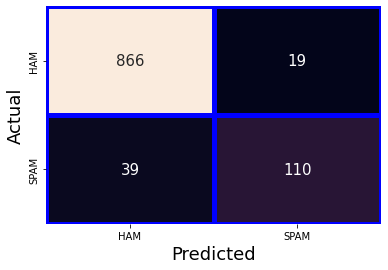

Out of 1034 testing values 58 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       885
           1       0.85      0.74      0.79       149

    accuracy                           0.94      1034
   macro avg       0.90      0.86      0.88      1034
weighted avg       0.94      0.94      0.94      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Decision Tree :
Train Acuuracy=1.0
Test Acuuracy=0.9603
Precission=0.903
Recall=0.8121
F1 Score=0.8551
Confusion Matrix:



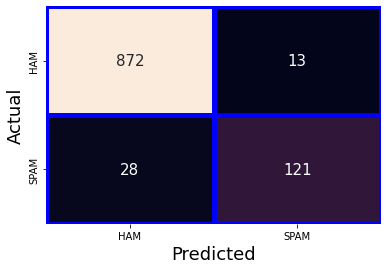

Out of 1034 testing values 41 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       885
           1       0.90      0.81      0.86       149

    accuracy                           0.96      1034
   macro avg       0.94      0.90      0.92      1034
weighted avg       0.96      0.96      0.96      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Random Forest :
Train Acuuracy=1.0
Test Acuuracy=0.9516
Precission=1.0
Recall=0.6644
F1 Score=0.7984
Confusion Matrix:



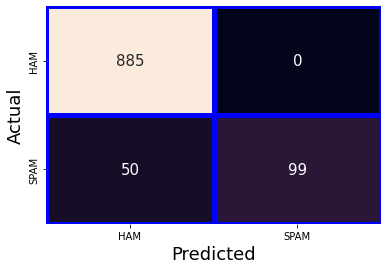

Out of 1034 testing values 50 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       885
           1       1.00      0.66      0.80       149

    accuracy                           0.95      1034
   macro avg       0.97      0.83      0.89      1034
weighted avg       0.95      0.95      0.95      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Ada Boost :
Train Acuuracy=0.9809
Test Acuuracy=0.9671
Precission=0.9389
Recall=0.8255
F1 Score=0.8786
Confusion Matrix:



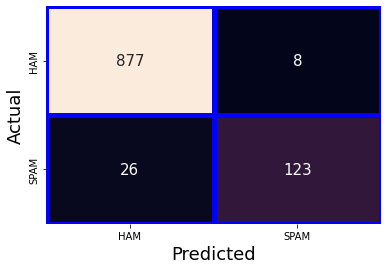

Out of 1034 testing values 34 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       885
           1       0.94      0.83      0.88       149

    accuracy                           0.97      1034
   macro avg       0.96      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building Gradient Boost :
Train Acuuracy=0.986
Test Acuuracy=0.9729
Precission=0.9764
Recall=0.8322
F1 Score=0.8986
Confusion Matrix:



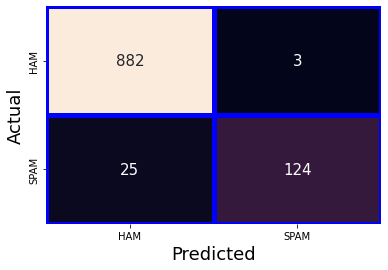

Out of 1034 testing values 28 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.98      0.83      0.90       149

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Building XG Boost :
Train Acuuracy=0.9976
Test Acuuracy=0.9613
Precission=0.9823
Recall=0.745
F1 Score=0.8473
Confusion Matrix:



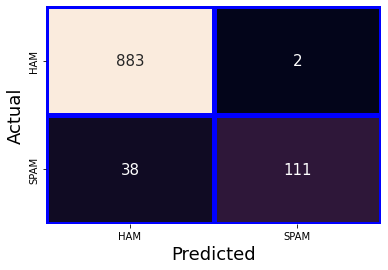

Out of 1034 testing values 40 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       885
           1       0.98      0.74      0.85       149

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



In [43]:
for algorithm, classifier in models.items():
    print("Building", algorithm, ":")
    classifier.fit(x_train_tfidf, y_train)
    y_train_pred=classifier.predict(x_train_tfidf)
    y_test_pred=classifier.predict(x_test_tfidf)
    train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
    test_accuracy=round(accuracy_score(y_test, y_test_pred), 4)
    precision=round(precision_score(y_test, y_test_pred), 4)
    recall=round(recall_score(y_test, y_test_pred), 4)
    f1=round(f1_score(y_test, y_test_pred), 4)
    print("Train Acuuracy={}\nTest Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(train_accuracy, test_accuracy,
                                                                                              precision, recall, f1))
    print("Confusion Matrix:\n")
    sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["HAM","SPAM"], xticklabels=["HAM","SPAM"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.show()
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_test_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_test_pred))
    print("-+-+"*20)
    print()

### Conclusion for ML model using TfIdf Vectorizer.
<h3 style="color:blue; line-height:1.5;">1. Training accuracy is high in both Decision Tree and Random Forest=100%.<br>2.Testing accuracy is high in Gradient Boosting=97.29%.<br>3. F1 Score is high in Gradient Boosting=90%.<br>4. Only 28 values are misclassified in Gradient boosting.<br>5. Gradient Boosting is the best model to predict whether the SMS is spam or not when we use TFIDF vectorizer.</h3>

<h3 style="color:red; font-family:Arial Black;line-height:1.5">XGBoost is the best model with Count Vectorizer as text to numeric converter with accuracy of 98% and F1 score of 93%.</h3>

<h2 style="color:blue; background:lightgreen; line-height:2">Hyperparameter Tunning to find best parametrs.</h2>

In [33]:
from sklearn.model_selection import GridSearchCV, KFold

In [40]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear']
}

classifier=XGBClassifier(n_jobs=-1)
grid=GridSearchCV(classifier, params, n_jobs=-1, cv=KFold(n_splits=3), scoring='f1')
grid.fit(x_train_cnt, y_train)

print('Best score:', grid.best_score_)
print('Best score:', grid.best_params_)

Best score: 0.8857421707879142
Best score: {'booster': 'gbtree', 'learning_rate': 0.05, 'n_estimators': 500}


Train Acuuracy=0.9964
Test Acuuracy=0.9816
Precission=0.971
Recall=0.8993
F1 Score=0.9338
Confusion Matrix:



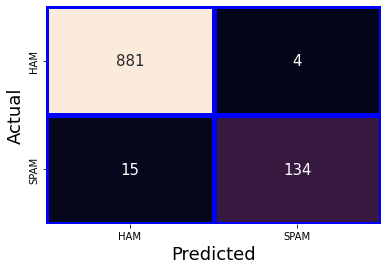

Out of 1034 testing values 19 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



In [41]:
classifier=XGBClassifier(booster= 'gbtree', learning_rate= 0.05, n_estimators= 500)
classifier.fit(x_train_cnt, y_train)
y_train_pred=classifier.predict(x_train_cnt)
y_test_pred=classifier.predict(x_test_cnt)
train_accuracy=round(accuracy_score(y_train, y_train_pred), 4)
test_accuracy=round(accuracy_score(y_test, y_test_pred), 4)
precision=round(precision_score(y_test, y_test_pred), 4)
recall=round(recall_score(y_test, y_test_pred), 4)
f1=round(f1_score(y_test, y_test_pred), 4)
print("Train Acuuracy={}\nTest Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(train_accuracy, test_accuracy,
                                                                                              precision, recall, f1))
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["HAM","SPAM"], xticklabels=["HAM","SPAM"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_test_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_test_pred))
print("-+-+"*20)
print()

### Accuracy and F1 score incresed slightly, not much difference.